In [1]:
from PIL import Image                         # For reading image                 
from IPython.display import display           # For displaying jpg file in jupyter notebook
from IPython.display import Image as Img      # NOTE: It will cause name clash if i don't import it as Img

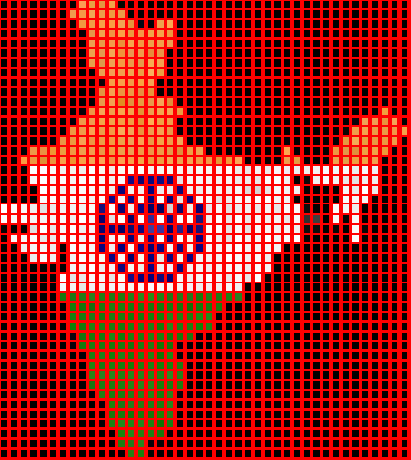

In [35]:
im = Image.open("color-normalized.png")
px = im.load()
im

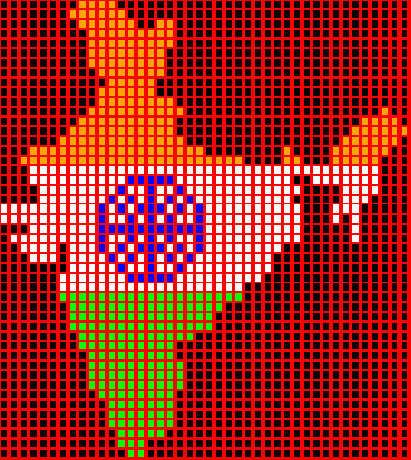

In [36]:
n, m = im.size
red = (255, 0, 0)
color_matrix = [[]]
for i in range(n-1):
    if color_matrix[-1]: color_matrix.append([])
    for j in range(m-1):
        if px[i,j] == red and px[i+1,j] == red and px[i,j+1] == red and px[i+1,j+1] != red:
            # we got top left corner of a grid
            # now we will fill the whole grid with the center color
            i1, j1 = i+1, j+1
            r, g, b = px[i1, j1]
            if r > 200 and g > 200 and b > 200:
                center_color = (255, 255, 255)
            elif r > 150 and g > 100:
                center_color = (255, 165, 0)
            elif g > 80:
                center_color = (0, 255, 0)
            elif b > 65:
                center_color = (0, 0, 255)
            else:
                center_color = (0, 0, 0)
            while i1 < n and px[i1, j+1] != red:
                i1 += 1
            while j1 < m and px[i+1, j1] != red:
                j1 += 1
            for i2 in range(i+1, i1):
                for j2 in range(j+1, j1):
                    px[i2, j2] = center_color
            color_matrix[-1].append(center_color)
if not color_matrix[-1]: color_matrix.pop()                    
im

In [37]:
im.save("color-standard.png")

In [38]:
n, m = len(color_matrix), len(color_matrix[0])

In [39]:
im = Image.new(mode="RGB", size=(n, m))

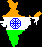

In [41]:
for i in range(n):
    for j in range(m):
        im.putpixel((i, j), color_matrix[i][j])

im.save("india-final.png")
im

In [42]:
color_dict = {
    (255, 255, 255): "white",
    (255, 165, 0): "orange",
    (0, 255, 0): "green",
    (0, 0, 255): "blue",
    (0, 0, 0): "black"
}

In [43]:
color_data = [[color_dict[color_matrix[i][j]] for j in range(m)] for i in range(n)]

In [46]:
with open("color_matrix_data.py", "w") as f:
    f.write("color_data = " + str(color_data))